# Boosting

Boosting refers to Ensemble methods that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.

## AdaBoost
AdaBoost, short for *Adaptive Boosting*, is a boosting methods where each predictor is trained with more attention to the training instances that its predecessor underfitted.

### AdaBoost algorithm
- Train a base classifier (such as a Decision Tree)
- Calculate the accuracy of the base classifier and find all misclassified training instances
- Increase the weights of the misclassified training instances
- Train a second base classifier
- Repeat Step 2-4

The **weight** of a training instance refers to the factor of its error term in the cost function.

Once all predictors are trained, the ensemble makes predictions by taking votes from each base predictor. Unlike bagging/pasting methods, predictors have different weights depending on their overall accuracy on the weighted training set.

## Example 1: AdaBoost with SVM

**Warning**: SVM is not a good choice of base predictor for AdaBoost, bacause they are slow and tend to be unstable with AdaBoost

In [15]:
# Generate datasets
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
X, y = make_moons(n_samples=500,
                  noise=0.3)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

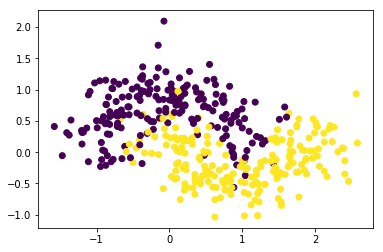

In [16]:
# Plot training set
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

In [33]:
# Step 1: Apply SVM as base classifier
from sklearn.svm import SVC
svm1 = SVC(kernel="rbf",
           C=0.05)
learning_rate = 0.5
weights = np.ones(len(X_train))
svm1.fit(X_train, y_train, sample_weight=weights)

SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

svm1 training accuracy: 0.86


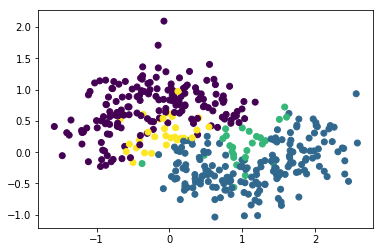

In [34]:
# Step 2: Calculate training accuracy 
#   and find all misclassified instances
from sklearn.metrics import accuracy_score
y_train_pred = svm1.predict(X_train)
accs = accuracy_score(y_train, y_train_pred)
print('svm1 training accuracy:', train_acc)

# color misclassified instances differently
color_train = y_train + 2 * (y_train != y_train_pred)

plt.scatter(X_train[:, 0],
            X_train[:, 1],
            c=color_train)
plt.show()

In [37]:
# Step 3: Increase the weights of misclassified instances
learning_rate = 0.5
weights[y_train_pred != y_train] *= 1 + learning_rate

In [ ]:
# Step 4: Train a second base classifier and repeat

# Build an SVM, fit the weighted training data



# Calculate training accuracy



# (Visualize misclassified instances)



# Increase the weight of misclassified instances

In [38]:
# Let's build a third base classifier

In [40]:
# Use the weighted voting to decide the class of a new instance
# The weight of a classifier is determined by the following equation
# weight = log((1 - acc) / acc)

### Example 2: Using sklearn library

In [1]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoostClassifier?

In [5]:
model = AdaBoostClassifier(
    base_estimator=None,
    n_estimators=100
)
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

## Gradient Boosting
Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration, this method tries to fit the new predictor to the *residual errors* made by the previous predictor

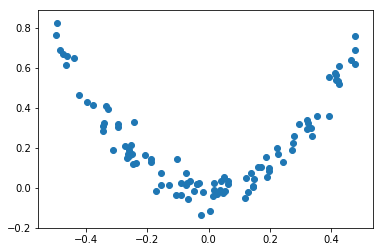

In [41]:
# Create dataset for regression
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)
plt.scatter(X, y)
plt.show()

In [42]:
# Build a base Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
dt1 = DecisionTreeRegressor(max_depth=2)
dt1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

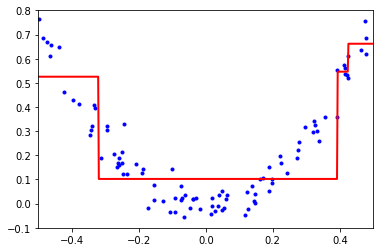

In [47]:
# Visualize the regression line

def plot_predictions(regressors,
                     X,
                     y,
                     axes,
                     label=None,
                     style='r-',
                     data_label=None,
                     data_style='b.'):
    # Create a input array
    x1 = np.linspace(axes[0], axes[1], 500)
    
    # Obtain model prediction
    y_pred = sum(regressor.predict(x1.reshape(-1, 1))\
                 for regressor in regressors)
    
    # Plot data points
    plt.plot(X[:, 0], y, data_style, label=data_label)
    
    # Plot regression line
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    
    plt.legend(loc='upper center', fontsize=16)
    plt.axis(axes)

plot_predictions([dt1], X, y,
                 axes=[-0.5, 0.5, -0.1, 0.8])

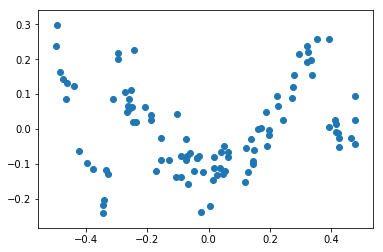

In [48]:
# Calculate the residual errors made by this regressor
y2 = y - dt1.predict(X)
plt.scatter(X, y2)
plt.show()

In [49]:
# Build another Decision Tree to fit y2
dt2 = DecisionTreeRegressor(max_depth=2)
dt2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

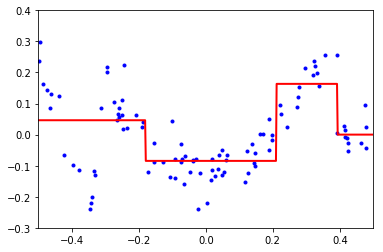

In [50]:
# Visualize the second regressor
plot_predictions([dt2], X, y2,
                 axes=[-0.5, 0.5, -0.3, 0.4])

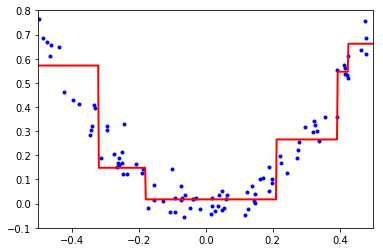

In [51]:
# Visualize the ensemble
plot_predictions([dt1, dt2], X, y,
                 axes=[-0.5, 0.5, -0.1, 0.8])

In [52]:
# Calculate the residual error of the second regressor

In [53]:
# Build a new Decision Tree regressor to fit the residual errors

In [54]:
# Visualize the third regressor using plot_predictions()

In [55]:
# Visualize the ensemble using plot_predictions()

### Gradient Boosting using sklearn

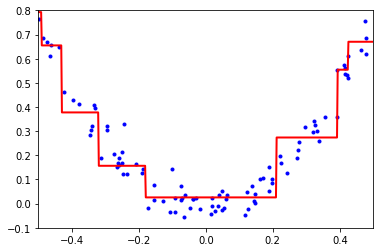

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(max_depth=2,
                                  n_estimators=3,
                                  learning_rate=1.0)
model.fit(X, y)
plot_predictions([model], X, y, axes=[-0.5, 0.5, -0.1, 0.8])

- learning_rate shrinks the contribution of each tree, reducing model overfitting
- subsample: limiting the fraction of samples to be used for fitting each individual tree.

In [61]:
# Build a Gradient Boosting Ensemble with
# 100 decision tree regressors with learning_rate = 0.1
# and subsample=0.25




# Plot the regression line

## Stacking

Stacking is based on a simple idea: instead of using trivial function (such as hard voting), why don't we train a model to aggregate the predictions of all base predictors? A common approach is to split the training set into two subsets. The first subset is used to train each base predictors, and the second subset is used to train the *meta learner*.

### Stacking algorithm
- Split the training set into $S_1$ and $S_2$.
- Train each base predictor by fitting it to $S_1$.
- Record the prediction of each base predictor on $S_2$.
- Use these predictions as input, train the meta learner.

# Chapter 8
# Dimensionality Reduction

Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only does this make training extremely slow, it can also make it much harder to find a good solution. This problem is often referred to as the **curse of dimensionality**.

Fortunately, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one. This procedure is called **dimensionality reduction**. 

### Main approaches for dimensionality reduction
- Projection: remove features which have little variation.
- Manifold learning: Use a few parameters to describe the dataset.
- Principal Component Analysis (PCA): use matrix decomposition techniques to find the most important feature combinations.

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X = mnist["data"]
y = mnist["target"]

/home/liang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/home/liang/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


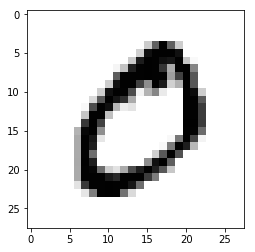

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X[0, :].reshape(28, 28),
           cmap=plt.cm.binary)
plt.show()

In [5]:
# use PCA to reduce the number of features
from sklearn.decomposition import PCA

pca = PCA(n_components=150)
X_reduced = pca.fit_transform(X)

print('X shape:', X.shape)
print('X_reduced shape:', X_reduced.shape)

X shape: (70000, 784)
X_reduced shape: (70000, 150)


In [6]:
# Recover the data from compressed representation
X0 = pca.inverse_transform(X_reduced[0])

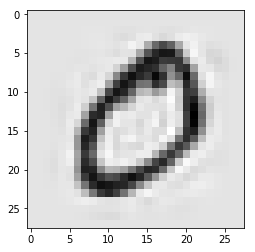

In [7]:
# Display the recovered image
plt.imshow(X0.reshape(28, 28),
           cmap=plt.cm.binary)
plt.show()